In [1]:
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import jax.numpy as jnp

warnings.filterwarnings("ignore", category=DeprecationWarning) 

import wandb
import numpy as np
from dataset_utils import batch_to_jax
import gym
import wrappers

Exception: 
Missing path to your environment variable. 
Current values LD_LIBRARY_PATH=/mmfs1/gscratch/weirdlab/sriyash/anaconda3/envs/offline/lib/python3.8/site-packages/cv2/../../lib64:
Please add following line to .bashrc:
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/mmfs1/home/sriyash/.mujoco/mujoco210/bin

In [110]:

def plot_values_2d(env, reward_model):
    # TODO: hardcoded
    obs = jnp.mgrid[
        -1.39850204:1.39850204:20j,
        -2.40100541:2.40100541:20j,
    ]
    input_size, x_range, y_range = obs.shape
    obs = obs.reshape(input_size, -1).T
    vel = jnp.zeros_like(obs)
    obs = jnp.concatenate((obs, vel), axis=1)
    N = obs.shape[0]

    plots = {}
    for name, actions in [
        # ('right', jnp.concatenate((jnp.ones((N, 1)), jnp.zeros((N, 1))), axis=1)),
        # ('left', jnp.concatenate((-jnp.ones((N, 1)), jnp.zeros((N, 1))), axis=1)),
        # ('up', jnp.concatenate((jnp.zeros((N, 1)), jnp.ones((N, 1))), axis=1)),
        ('down', jnp.concatenate((jnp.zeros((N, 1)), -jnp.ones((N, 1))), axis=1)),
    ]:
        input = dict(
            observations=obs,
            actions=actions,
            next_observations=obs
        )

        jax_input = batch_to_jax(input)
        new_reward = reward_model.get_reward(jax_input)
        new_reward = np.asarray(list(new_reward))

        fig, ax = plt.subplots()
        # TODO: hardcoded
        # plt.xlim(-1.4, 1.4)
        # plt.ylim(-2.4, 2.4)
        colormap = cm.bwr

        # TODO: vmin/vmax hardcoded
        # norm = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True)
        new_reward = new_reward.reshape((20, 20))
        im = ax.imshow(new_reward.T, cmap='viridis', interpolation='nearest')
        ax.scatter(x = env.get_target()[0], y = env.get_target()[1], color='red', s=100)
        # plt.quiver(
        #     obs[:, 0], obs[:, 1], 
        #     actions[:, 0], actions[:, 1],
        #     color=colormap(new_reward),
        #     angles='xy', scale_units='xy',
        #     scale=5,
        #     pivot='mid'
        # )
        # sm = cm.ScalarMappable(cmap=colormap)
        # sm.set_array([])
        cb = fig.colorbar(im, ax=ax)
        cb.set_label('r(s,a)')
        
        # heatmap = wandb.Image(fig)
        plt.title(f"{name}_action_heatmap")
        plt.show()
        # plt.close(fig)

    return plots

In [118]:
env_name = "multi-maze2d-open-v0"
seed = 0
ckpt_dir = "/home/max/Distributional-Preference-Learning/PreferenceTransformer/logs/maze_pref_reward/maze2d-open-v0/MR/maze_open/s0"

In [119]:
env = gym.make(env_name)
env = wrappers.EpisodeMonitor(env)
env = wrappers.SinglePrecision(env)
env.seed(seed)
env.action_space.seed(seed)
env.observation_space.seed(seed)

/home/max/anaconda3/envs/offline/lib/python3.8/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment antmaze-medium-play-v1 is out of date. You should consider upgrading to version `v2` with the environment ID `antmaze-medium-play-v2`.
  logger.warn(
/home/max/Distributional-Preference-Learning/PreferenceTransformer/d4rl/d4rl/locomotion/ant.py:180: UserWarning: This environment is deprecated. Please use the most recent version of this environment.
  offline_env.OfflineEnv.__init__(self, **kwargs)
/home/max/anaconda3/envs/offline/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


[0]

In [120]:
env.observation_space, env.action_space

(Box(-inf, inf, (29,), float32), Box(-1.0, 1.0, (8,), float32))

In [113]:
import os
import pickle

def initialize_model():
    if os.path.exists(os.path.join(ckpt_dir, "best_model.pkl")):
        model_path = os.path.join(ckpt_dir, "best_model.pkl")
    else:
        model_path = os.path.join(ckpt_dir, "model.pkl")

    with open(model_path, "rb") as f:
        ckpt = pickle.load(f)
    reward_model = ckpt['reward_model']
    return reward_model

In [114]:
reward_model = initialize_model()

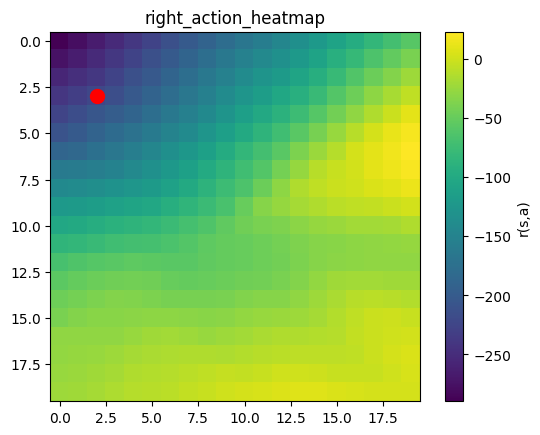

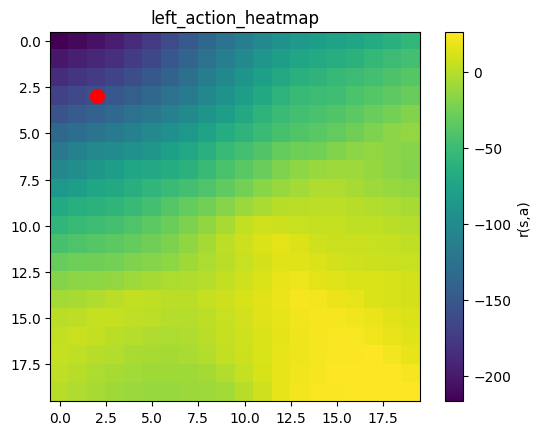

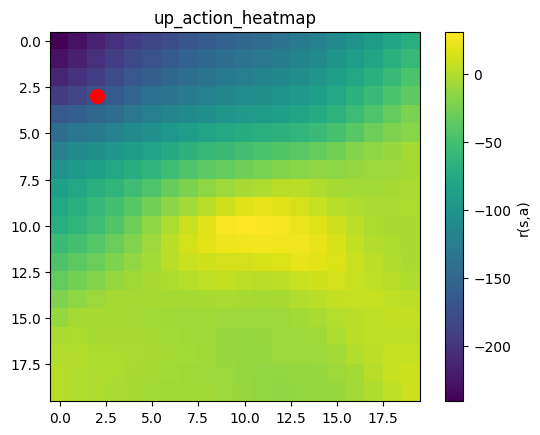

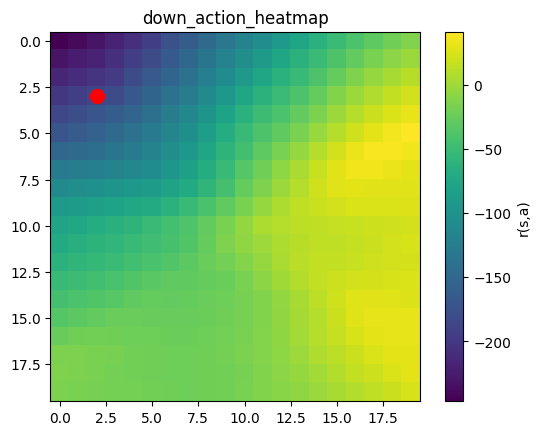

{}

In [115]:
plot_values_2d(env, reward_model)